In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Kostic Colorectal Cancer

## Refseq OTU

In [2]:
task = 'Kostic Colorectal Cancer Healthy/Tumor Refseq OTU'
folder = 'kostic-tumorv2'

In [3]:
num_features = 911
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/kostic_refseq_exp1/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/kostic_refseq_exp2/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/kostic_refseq_exp3/best_test.csv', sep=';') # NoRel+CLR

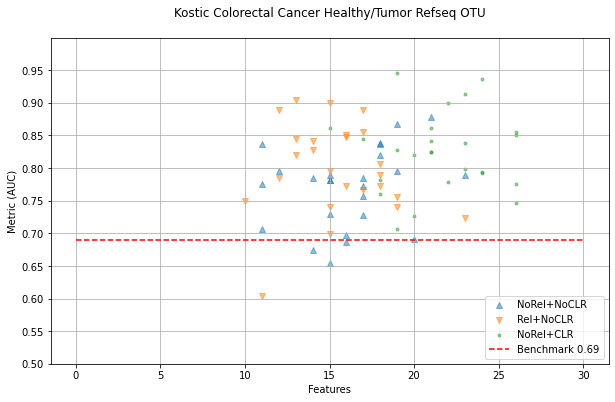

In [5]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.69, filename='./plotsv2/kostic_tumor_refseq_otu.png', xmax=30, ylim=(0.5, 1))

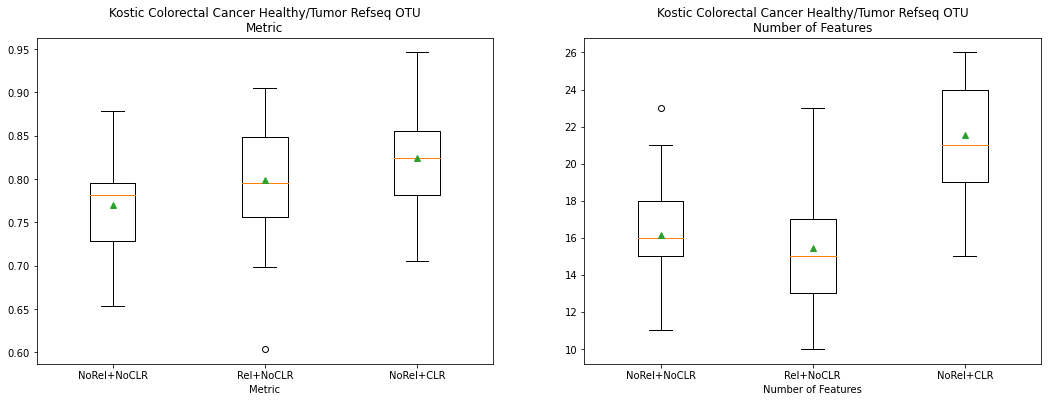

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, title=task, filename='./plotsv2/kostic_tumor_boxplot_refseq_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
from tasks import *
import run_best_features

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 911)


In [11]:
# Experiment 2

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 911)


In [12]:
# Experiment 3

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 911)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
7,5,18,0.820,0.800,"[0, 2, 5, 7, 45, 154, 226, 293, 307, 313, 437,...",0.800,0.800,"[0.955, 0.773, 0.829, 0.798, 0.735, 0.882, 0.7...",0.815,0.644,0.971,0.062
11,9,12,0.796,0.783,"[293, 300, 411, 437, 490, 491, 554, 711, 734, ...",0.783,0.783,"[0.865, 0.758, 0.806, 0.867, 0.891, 0.699, 0.8...",0.814,0.593,0.927,0.059
16,10,15,0.782,0.766,"[79, 168, 208, 225, 293, 308, 339, 407, 474, 5...",0.766,0.766,"[0.792, 0.901, 0.746, 0.796, 0.761, 0.825, 0.8...",0.811,0.663,0.948,0.056
10,8,18,0.839,0.819,"[46, 119, 153, 168, 208, 233, 266, 267, 269, 3...",0.819,0.819,"[0.867, 0.772, 0.83, 0.841, 0.76, 0.858, 0.865...",0.805,0.638,0.910,0.055
19,12,18,0.837,0.817,"[1, 201, 212, 214, 293, 317, 410, 439, 446, 49...",0.817,0.817,"[0.792, 0.775, 0.865, 0.796, 0.83, 0.744, 0.84...",0.802,0.630,0.924,0.062


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
22,18,16,0.851,0.833,"[153, 178, 208, 348, 409, 410, 445, 456, 471, ...",0.833,0.833,"[0.849, 0.851, 0.794, 0.908, 0.82, 0.799, 0.78...",0.837,0.709,0.965,0.056
26,21,13,0.844,0.830,"[29, 86, 94, 98, 117, 208, 380, 405, 409, 491,...",0.830,0.830,"[0.817, 0.874, 0.837, 0.884, 0.829, 0.76, 0.74...",0.822,0.571,0.971,0.069
20,16,15,0.900,0.884,"[2, 29, 33, 131, 348, 381, 388, 409, 446, 520,...",0.884,0.884,"[0.903, 0.789, 0.872, 0.863, 0.913, 0.82, 0.93...",0.820,0.687,0.948,0.061
17,13,18,0.789,0.769,"[74, 94, 126, 151, 297, 300, 367, 402, 407, 40...",0.769,0.769,"[0.735, 0.782, 0.824, 0.72, 0.787, 0.74, 0.773...",0.806,0.638,0.931,0.059
28,23,17,0.889,0.870,"[5, 29, 139, 178, 200, 201, 307, 348, 388, 407...",0.870,0.870,"[0.796, 0.792, 0.702, 0.829, 0.727, 0.73, 0.82...",0.801,0.673,0.941,0.058


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
20,9,24,0.936,0.910,"[16, 29, 39, 51, 174, 192, 213, 214, 229, 278,...",0.910,0.910,"[0.867, 0.789, 0.827, 0.791, 0.803, 0.884, 0.7...",0.810,0.673,0.952,0.057
36,24,23,0.913,0.888,"[29, 33, 46, 125, 266, 300, 314, 380, 408, 409...",0.888,0.888,"[0.856, 0.893, 0.737, 0.82, 0.813, 0.689, 0.75...",0.803,0.689,0.941,0.054
32,20,15,0.862,0.846,"[29, 70, 90, 203, 307, 355, 387, 389, 393, 673...",0.846,0.846,"[0.775, 0.761, 0.739, 0.657, 0.779, 0.872, 0.6...",0.791,0.644,0.927,0.059
22,11,17,0.844,0.825,"[33, 66, 127, 194, 208, 210, 298, 402, 444, 46...",0.825,0.825,"[0.73, 0.808, 0.725, 0.837, 0.728, 0.782, 0.76...",0.787,0.576,0.931,0.067
34,22,23,0.839,0.814,"[2, 18, 80, 175, 202, 208, 222, 232, 268, 297,...",0.814,0.814,"[0.761, 0.785, 0.765, 0.735, 0.777, 0.723, 0.7...",0.782,0.630,0.941,0.063


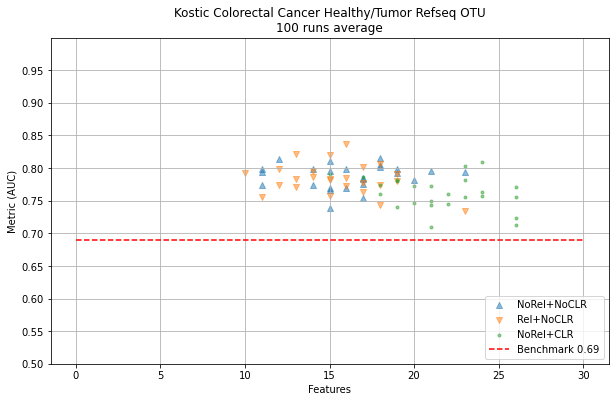

In [16]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.69, filename='./plotsv2/kostic_tumor_refseq_otu_avg_n.png', xmax=30, ylim=(0.5, 1))

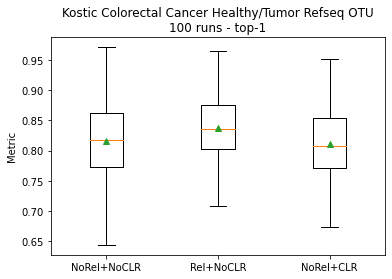

In [17]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plotsv2/kostic_tumor_boxplot_nruns_top1_refseq_otu.png')

---

In [8]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [9]:
folder = 'kostic-tumorv2'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

best_n_features = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [10]:
config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    score, fi = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    score, fi = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['Rel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    score, fi = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+CLR'].append(len(top_n_features))

Final dataset shape: (172, 911)
Final dataset shape: (172, 911)
Final dataset shape: (172, 911)


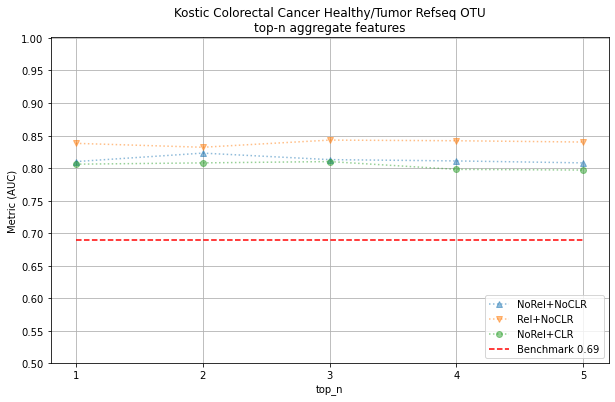

In [11]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.69, filename='./plotsv2/kostic_tumor_nruns_topn_refseq_otu.png', xmax=(top_n-1), ylim=(0.5, 1.001), top_n=top_n)

In [22]:
print(best_n)
print(best_n_features)

{'NoRel+NoCLR': [0.81, 0.823, 0.813, 0.811, 0.808], 'Rel+NoCLR': [0.838, 0.832, 0.843, 0.842, 0.84], 'NoRel+CLR': [0.806, 0.808, 0.81, 0.798, 0.797]}
{'NoRel+NoCLR': [18, 24, 38, 50, 64], 'Rel+NoCLR': [16, 26, 37, 51, 61], 'NoRel+CLR': [24, 44, 57, 70, 89]}


---

In [13]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [14]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
score, fi = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0119       NR_112143.1_Bacteroides_vulgatus_strain_JCM_5826_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0185       NR_043550.1_{Clostridium}_saccharogumia_strain_SDG-Mt85-3Db_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0405       NR_113316.1_Collinsella_aerofaciens_strain_JCM_10188_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0409       NR_118588.1_Citrobacter_koseri_strain_CIP_82.87_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0426       NR_147398.1_Anaerotruncus_rubiinfantis_strain_MT15_16S_ribosomal_RNA__partial_sequence
          -            0.0436       NR_104799.1_Anaerostipes_hadrus_strain_DSM_3319_16S_ribosomal_RNA_gene__partial_sequence
          -            0.044        NR_113411.1_Prevotella_copri_strain_JCM_13464_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0456       NR_024906.1_Enterococcus_mundt

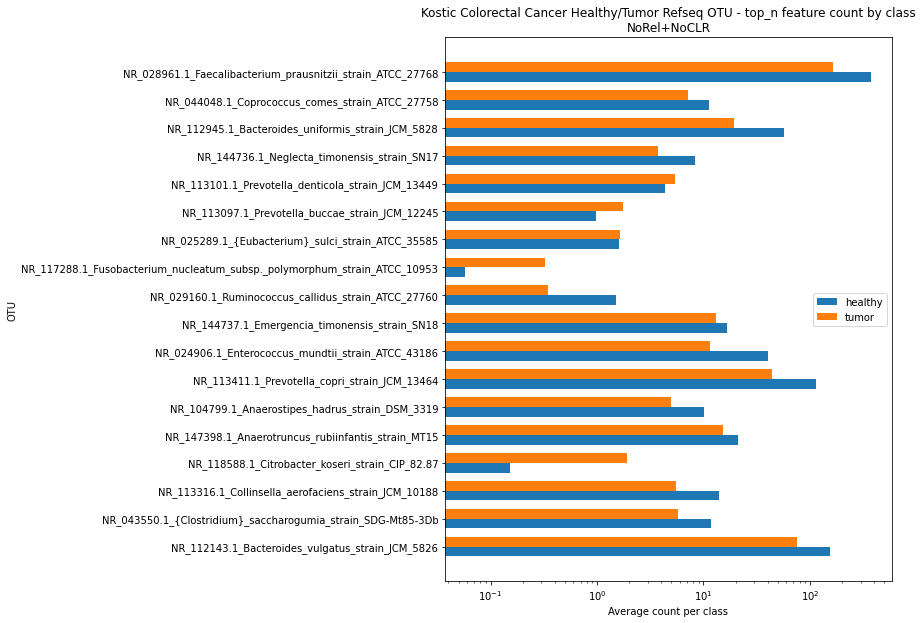

In [15]:
features = data1.features[top_n_features].astype(str)
filename = f'./plotsv2/kostic_tumor_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data1, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,10), filename=filename, clean_otu=True)

In [16]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0134       NR_112902.1_Phascolarctobacterium_succinatutens_strain_YIT_12067_16S_ribosomal_RNA_gene__partial_sequence
          -            0.016        NR_074902.1_Escherichia_fergusonii_strain_ATCC_35469_16S_ribosomal_RNA_gene__complete_sequence
          -            0.0187       NR_074634.1_Eubacterium_rectale_strain_ATCC_33656_16S_ribosomal_RNA_gene__complete_sequence
          -            0.0226       NR_115502.1_{Ruminococcus}_torques_strain_GIFU_12126_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0274       NR_036800.1_{Ruminococcus}_gnavus_strain_ATCC_29149_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0294       NR_028690.1_Treponema_socranskii_strain_D56BRIII6_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0298       NR_025148.1_Streptococcus_iniae_strain_ATCC_29178_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0308       NR_04

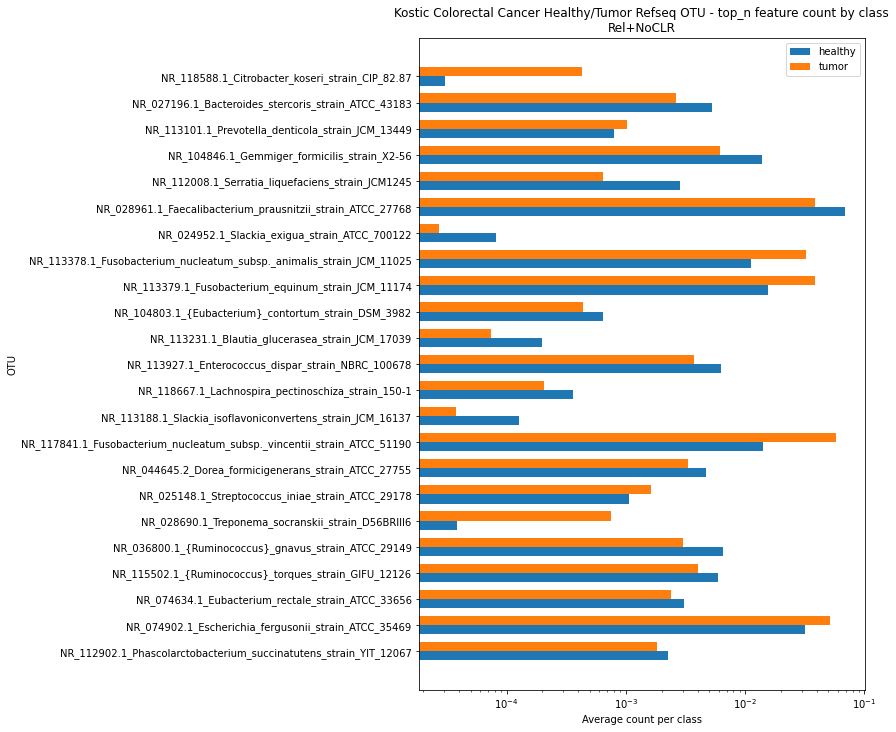

In [17]:
features = data2.features[top_n_features].astype(str)
filename = f'./plotsv2/kostic_tumor_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data2, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,12), filename=filename, clean_otu=True)

In [18]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0175       NR_117778.1_Sutterella_wadsworthensis_strain_WAL_9799_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0228       NR_041461.1_Bacteroides_coprophilus_strain_CB42_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0233       NR_074634.1_Eubacterium_rectale_strain_ATCC_33656_16S_ribosomal_RNA_gene__complete_sequence
          -            0.026        NR_042777.1_Streptococcus_vestibularis_strain_ATCC_49124_16S_ribosomal_RNA_gene__complete_sequence
          -            0.0275       NR_147370.1_Pseudoflavonifractor_phocaeensis_strain_Marseille-P3064_16S_ribosomal_RNA__partial_sequence
          -            0.0307       NR_041668.1_Barnesiella_intestinihominis_strain_YIT_11860_16S_ribosomal_RNA_gene__partial_sequence
          -            0.035        NR_112931.1_Bacteroides_acidifaciens_strain_JCM_10556_16S_ribosomal_RNA_gene__partial_sequence
          -            0.036  

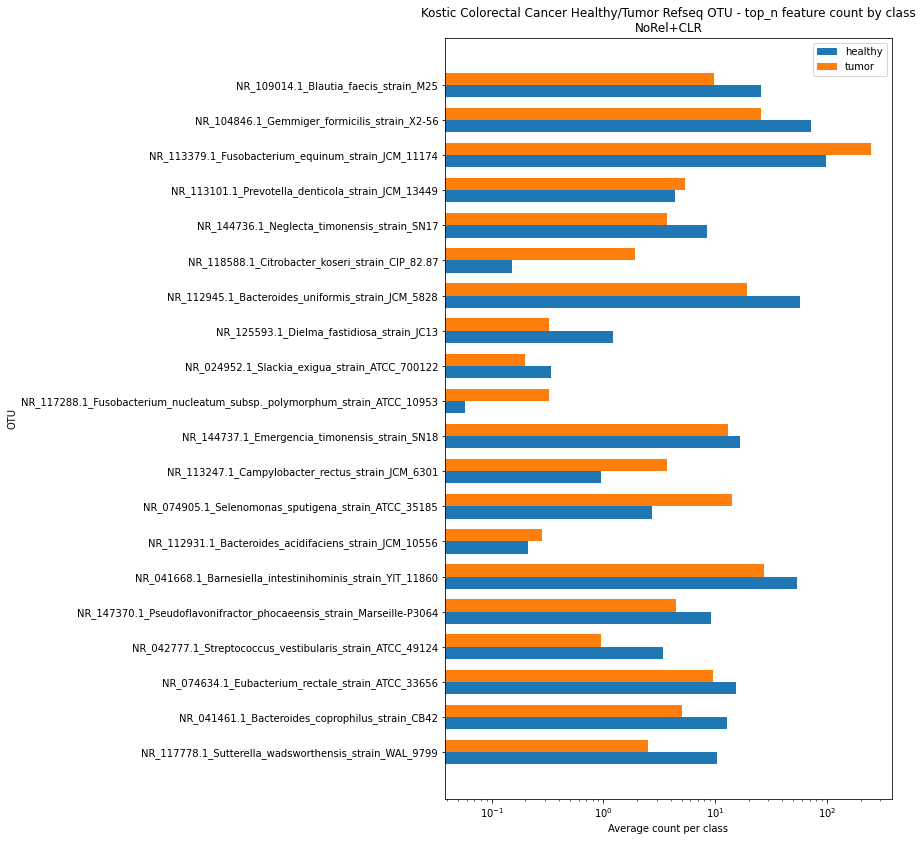

In [21]:
features = data3.features[top_n_features].astype(str)
filename = f'./plotsv2/kostic_tumor_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data3, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,14), filename=filename, clean_otu=True)